In [74]:
## Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

In [75]:
## Load data and show the number of observations
Boston = pd.read_csv("Boston.csv", index_col=0)
Boston.shape[0]

506

In [76]:
## Display the names of the variables
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='str')

In [77]:
## Static summary of the predictiors &  the response medv
sum_tbl = Boston.describe(percentiles=[0.25, 0.5, 0.75]).loc[["min", "25%", "50%", "mean", "75%", "max"]]
sum_tbl.index = ["Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", "Max."]

groups = [
    ["crim", "zn", "indus", "chas"],
    ["nox", "rm", "age", "dis"],
    ["rad", "tax", "ptratio", "black"],
    ["lstat", "medv"]
]

for g in groups:
    print(" ".join(g))
    print(sum_tbl[g].to_string(float_format=lambda x: f"{x:0.5f}"))
    print()

crim zn indus chas
            crim        zn    indus    chas
Min.     0.00632   0.00000  0.46000 0.00000
1st Qu.  0.08204   0.00000  5.19000 0.00000
Median   0.25651   0.00000  9.69000 0.00000
Mean     3.61352  11.36364 11.13678 0.06917
3rd Qu.  3.67708  12.50000 18.10000 0.00000
Max.    88.97620 100.00000 27.74000 1.00000

nox rm age dis
            nox      rm       age      dis
Min.    0.38500 3.56100   2.90000  1.12960
1st Qu. 0.44900 5.88550  45.02500  2.10018
Median  0.53800 6.20850  77.50000  3.20745
Mean    0.55470 6.28463  68.57490  3.79504
3rd Qu. 0.62400 6.62350  94.07500  5.18843
Max.    0.87100 8.78000 100.00000 12.12650

rad tax ptratio black
             rad       tax  ptratio     black
Min.     1.00000 187.00000 12.60000   0.32000
1st Qu.  4.00000 279.00000 17.40000 375.37750
Median   5.00000 330.00000 19.05000 391.44000
Mean     9.54941 408.23715 18.45553 356.67403
3rd Qu. 24.00000 666.00000 20.20000 396.22500
Max.    24.00000 711.00000 22.00000 396.90000

lstat medv

In [78]:
## The number of data points
Boston.shape[1]

14

In [79]:
## Show a data subset
Boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


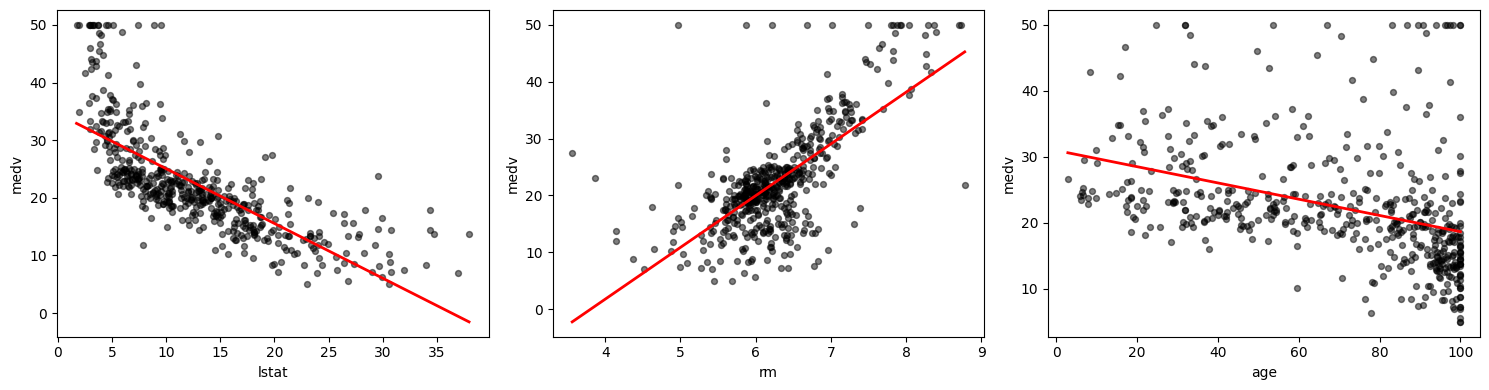

In [80]:
## Predcitors plot "lstat, rm and age"
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.regplot(data=Boston, x="lstat", y="medv", ci=None,
            scatter_kws={"color": "black", "alpha": 0.5, "s": 18},
            line_kws={"color": "red", "linewidth": 2},
            ax=axes[0])

sns.regplot(data=Boston, x="rm", y="medv", ci=None,
            scatter_kws={"color": "black", "alpha": 0.5, "s": 18},
            line_kws={"color": "red", "linewidth": 2},
            ax=axes[1])

sns.regplot(data=Boston, x="age", y="medv", ci=None,
            scatter_kws={"color": "black", "alpha": 0.5, "s": 18},
            line_kws={"color": "red", "linewidth": 2},
            ax=axes[2])

plt.tight_layout()
plt.show()


In [81]:
#Simple linear regressions lstat
lm_lstat = smf.ols("medv ~ lstat", data=Boston).fit()
lm_lstat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           5.08e-88
Time:                        16:36:46   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation simple linear regression lstat

This model estimates the conditional mean of `medv` as a linear function of `lstat`. The fitted line has an intercept of 34.55384 and a slope of -0.95005. This slope means that when `lstat` increases by one unit, the predicted mean of `medv` decreases by about 0.95005 units in this simple regression setting.

To test whether the slope is different from zero, we test `H0: B_lstat = 0` against `H1: B_lstat != 0`. The output reports `t ≈ -24.53` and `p ≈ 5.08e-88`. Since the p-value is far below 0.05, we reject `H0` and conclude that `lstat` has a statistically significant linear association with `medv`.

The model fit is `R2 ≈ 0.5441`, meaning `lstat` alone explains about 54.4% of the variation in `medv` with a linear relationship. The overall test gives `F ≈ 601.62` with a very small p-value, confirming the model is significant overall compared with a constant-only model.


In [82]:
#Simple linear regressions rm
lm_rm = smf.ols("medv ~ rm", data=Boston).fit()
lm_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           2.49e-74
Time:                        16:36:46   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation simple linear regression rm

This model estimates the conditional mean of `medv` as a linear function of `rm`. The fitted line has an intercept of -34.67062 and a slope of 9.10211. This slope means that when `rm` increases by one unit, the predicted mean of `medv` increases by about 9.10211 units in this simple regression setting.

To test whether the slope is different from zero, we test `H0: B_rm = 0` against `H1: B_rm != 0`. The output reports `t ≈ 21.72` and `p ≈ 2.49e-74`. Since the p-value is far below 0.05, we reject `H0` and conclude that `rm` has a statistically significant linear association with `medv`.

The model fit is `R2 ≈ 0.4835`, meaning `rm` alone explains about 48.35% of the variation in `medv`. The overall test gives `F ≈ 471.85` with a very small p-value, confirming the model is significant overall.

In [83]:
#Simple linear regressions age
lm_age = smf.ols("medv ~ age", data=Boston).fit()
lm_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           1.57e-18
Time:                        16:36:46   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
age           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation simple linear regression age

This model estimates the conditional mean of `medv` as a linear function of `age`. The fitted line has an intercept of 30.97868 and a slope of -0.12316. This slope means that when `age` increases by one unit, the predicted mean of `medv` decreases by about 0.12316 units in this simple regression setting.

To test whether the slope is different from zero, we test `H0: B_age = 0` against `H1: B_age != 0`. The output reports `t ≈ -9.14` and `p ≈ 1.57e-18`. Since the p-value is far below 0.05, we reject `H0` and conclude that `age` has a statistically significant linear association with `medv` in the simple model.

The model fit is `R2 ≈ 0.1421`, meaning `age` alone explains about 14.21% of the variation in `medv`, so it is much weaker than the simple models using `lstat` or `rm`.


In [84]:
#95% confidence intervals
print("CI for lstat model coefficients:\n", lm_lstat.conf_int(), "\n")
print("CI for rm model coefficients:\n", lm_rm.conf_int(), "\n")
print("CI for age model coefficients:\n", lm_age.conf_int(), "\n")

CI for lstat model coefficients:
                    0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951 

CI for rm model coefficients:
                    0          1
Intercept -39.876641 -29.464601
rm          8.278855   9.925363 

CI for age model coefficients:
                    0          1
Intercept  29.015752  32.941604
age        -0.149647  -0.096679 



### Interpretation "confidence intervals"

The 95% confidence interval gives a range for each coefficient. If the interval for a slope does not include 0, that supports the conclusion that the slope is different from 0 at the 5% level. In the printed results, the slope intervals for `lstat`, `rm`, and `age` do not include 0, which is consistent with the very small p-values from the slope tests in the three simple regressions.

In [85]:
# Predictions for lstat with prediction intervals
lm_lstat.get_prediction(pd.DataFrame({"lstat": [5, 10, 15]})).summary_frame(alpha=0.05)[
    ["mean", "obs_ci_lower", "obs_ci_upper"]
]

,mean,obs_ci_lower,obs_ci_upper
0,29.803594,17.565675,42.041513
1,25.053347,12.827626,37.279068
2,20.303101,8.077742,32.528459


### Interpretation (predictions using medv lstat)

The prediction output reports a predicted mean of `medv` and a 95% prediction interval for a single new observation. For example, when `lstat = 5` the predicted mean is about 29.80 and the prediction interval is roughly 17.57 to 42.04. When `lstat = 15` the predicted mean is about 20.30 and the interval is roughly 8.08 to 32.53. The predicted means decrease as `lstat` increases, matching the negative slope. The prediction intervals are wider because they describe expected variability for individual observations, not only uncertainty about the mean.


In [86]:
# Predictions for rm with prediction intervals
lm_rm.get_prediction(pd.DataFrame({"rm": [5, 6.5, 8]})).summary_frame(alpha=0.05)[
    ["mean", "obs_ci_lower", "obs_ci_upper"]
]

,mean,obs_ci_lower,obs_ci_upper
0,10.839924,-2.214474,23.894322
1,24.493088,11.480391,37.505784
2,38.146251,25.058353,51.234149


### Interpretation (predictions using medv rm)

The prediction output reports a predicted mean of `medv` and a 95% prediction interval for a single new observation. For example, when `rm = 5` the predicted mean is about 10.84 and the interval is roughly -2.21 to 23.89. When `rm = 8` the predicted mean is about 38.15 and the interval is roughly 25.06 to 51.23. The predicted means increase as `rm` increases, matching the positive slope. The wide intervals show that individual observations can vary substantially around the fitted line.


In [87]:
# Predictions for age with prediction intervals
lm_age.get_prediction(pd.DataFrame({"age": [25, 50, 75]})).summary_frame(alpha=0.05)[
    ["mean", "obs_ci_lower", "obs_ci_upper"]
]

,mean,obs_ci_lower,obs_ci_upper
0,27.899610,11.090368,44.708852
1,24.820542,8.043748,41.597335
2,21.741474,4.971031,38.511917


### Interpretation (predictions using medv age)

The prediction output reports a predicted mean of `medv` and a 95% prediction interval for a single new observation. For example, when `age = 25` the predicted mean is about 27.90 and the interval is roughly 11.09 to 44.71. When `age = 75` the predicted mean is about 21.74 and the interval is roughly 4.97 to 38.51. The predicted means decrease as `age` increases, matching the negative slope. The intervals remain wide, which is consistent with the low `R2` for this simple model.


In [88]:
# Mltiple regression for medv lstat + rm + age
lm_multi3 = smf.ols("medv ~ lstat + rm + age", data=Boston).fit()
lm_multi3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          1.20e-110
Time:                        16:36:46   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1753      3.182     -0.369      0.712      -7.427       5.076
lstat         -0.6685      0.054    -12.298      0.000      -0.775      -0.562
rm             5.0191      0.454     11.048      0.000       4.127       5.912
age            0.0091      0.011      0.811      0.418      -0.013       0.031
==============================================================================
Omnibus:                      138.819   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.436
Skew:                           1.296   Prob(JB):                     6.15e-91
Kurtosis:                       6.603   Cond. No.                         985.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation multiple linear regression lstat, rm and age

This model estimates the conditional mean of `medv` using `lstat`, `rm`, and `age` at the same time, so each slope is interpreted while holding the other predictors fixed. The output shows `lstat` has a slope around -0.6685 with `p is way under 0.05` and `rm` has a slope around 5.0191 with `p way under 0.05`. Since both p-values are far below 0.05, we reject `H0: B_lstat = 0` and reject `H0: B_rm = 0`.

For `age`, the slope is around 0.0091 with `p ≈ 0.418`. Since this p-value is greater than 0.05, we do not reject `H0: B_age = 0` in this multiple model. This means that after accounting for `lstat` and `rm`, there is not strong evidence that `age` adds an additional linear contribution to explaining `medv`.

The model fit is `R2 ≈ 0.6390`, meaning the three predictors together explain about 63.9% of the variation in `medv`. The overall F-test is strongly significant, so the model as a whole is useful compared with a constant-only model.


In [89]:
# full multiple regression "all predictors"
lm_all = smf.ols(
    "medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat",
    data=Boston
).fit()
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          6.72e-135
Time:                        16:36:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation full multiple regression with all predictors

This model uses all predictors to explain `medv` simultaneously. The output reports `R2 ≈ 0.7406` and adjusted `R2 ≈ 0.7338`, which indicates a strong overall fit even after accounting for the number of predictors. The overall test gives `F ≈ 108.08` with `p far under 0.05`, so we reject the null hypothesis that all slopes are zero and conclude that the model is significant overall.

Some individual predictors have large p-values in the full model. A large p-value means there is not enough evidence that the predictor adds a distinct linear contribution after controlling for the other predictors, which can happen when predictors overlap in the information they provide.

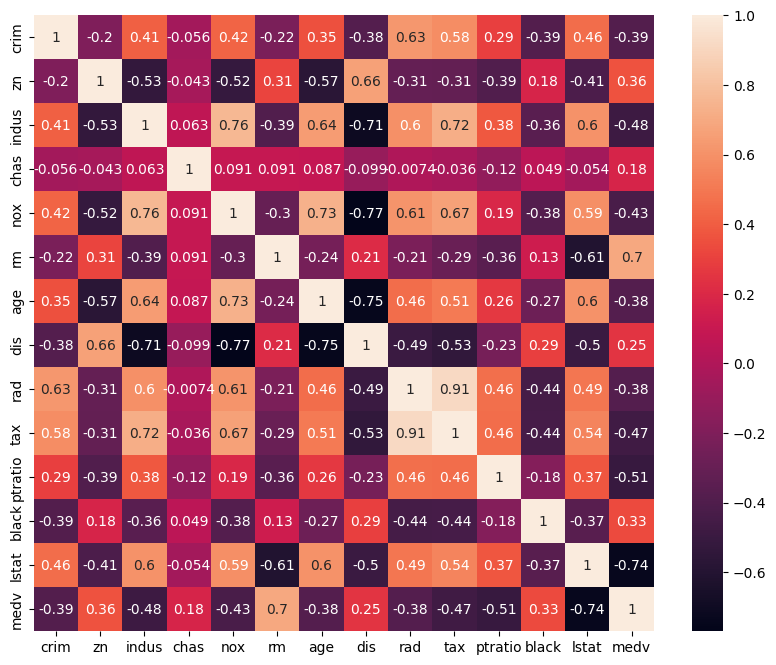

In [90]:
# Correlations
corr = Boston.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

### Interpretation correlation heatmap

The correlation heatmap summarizes pairwise linear relationships between variables. Strong correlations among predictors indicate overlap in information. When predictors overlap strongly, multiple regression coefficients can become less precise and some predictors may appear non-significant even if they were significant in simpler models.

In [91]:
# Correlations p-value matrix "pearson"
cols = Boston.columns
pvals = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols)

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        r, p = pearsonr(Boston[cols[i]], Boston[cols[j]])
        pvals.iat[i, j] = p
        pvals.iat[j, i] = p

pvals

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000e+00,5.506472e-06,1.450349e-21,0.209435,3.751739e-23,6.346703e-07,2.854869e-16,8.519949e-19,2.693844e-56,2.357127e-47,2.942922e-11,2.487274e-19,2.654277e-27,1.173987e-19
zn,5.506472e-06,1.000000e+00,1.289161e-38,0.337810,7.231578e-36,6.935337e-13,7.575575e-45,9.748287e-66,6.988109e-13,4.385492e-13,5.325074e-20,7.207719e-05,2.908736e-22,5.713584e-17
indus,1.450349e-21,1.289161e-38,1.000000e+00,0.157463,7.913361e-98,5.328458e-20,8.409642e-61,3.586280e-78,8.368289e-50,3.018199e-82,3.774843e-19,1.184586e-16,1.381948e-51,4.900260e-31
chas,2.094345e-01,3.378103e-01,1.574628e-01,1.000000,4.029050e-02,4.018410e-02,5.177446e-02,2.568848e-02,8.686789e-01,4.244225e-01,6.203916e-03,2.733379e-01,2.258990e-01,7.390623e-05
nox,3.751739e-23,7.231578e-36,7.913361e-98,0.040291,1.000000e+00,3.818694e-12,7.452392e-86,4.233063e-100,3.342034e-53,1.093287e-66,1.885692e-05,7.816936e-19,5.979284e-49,7.065042e-24
rm,6.346703e-07,6.935337e-13,5.328458e-20,0.040184,3.818694e-12,1.000000e+00,4.459649e-08,3.237746e-06,1.918446e-06,2.086816e-11,1.610820e-16,3.906695e-03,1.033009e-53,2.487229e-74
age,2.854869e-16,7.575575e-45,8.409642e-61,0.051774,7.452392e-86,4.459649e-08,1.000000e+00,9.857534e-92,2.360876e-27,2.551067e-34,2.338885e-09,3.911801e-10,2.783924e-51,1.569982e-18
dis,8.519949e-19,9.748287e-66,3.586280e-78,0.025688,4.233063e-100,3.237746e-06,9.857534e-92,1.000000e+00,1.418269e-32,1.025931e-38,1.229920e-07,2.278649e-11,6.356331e-33,1.206612e-08
rad,2.693844e-56,6.988109e-13,8.368289e-50,0.868679,3.342034e-53,1.918446e-06,2.360876e-27,1.418269e-32,1.000000e+00,4.129920e-195,1.778554e-28,6.592918e-26,9.904457e-32,5.465933e-19
tax,2.357127e-47,4.385492e-13,3.018199e-82,0.424423,1.093287e-66,2.086816e-11,2.551067e-34,1.025931e-38,4.129920e-195,1.000000e+00,5.686833e-28,1.367562e-25,2.583867e-40,5.637734e-29


In [92]:
# Numeric table "Correlations"
pairs = [("rad", "tax"), ("lstat", "medv"), ("rm", "medv"), ("age", "medv"), ("nox", "dis")]
rows = []

for a, b in pairs:
    r, p = pearsonr(Boston[a], Boston[b])
    rows.append({"pair": f"{a} vs {b}", "r": r, "p_value": p})

pd.DataFrame(rows)

,pair,r,p_value
0,rad vs tax,0.910228,4.129920e-195
1,lstat vs medv,-0.737663,5.081103e-88
2,rm vs medv,0.695360,2.487229e-74
3,age vs medv,-0.376955,1.569982e-18
4,nox vs dis,-0.769230,4.233063e-100


### Interpretation correlations with r and p-values

The correlation output provides correlation coefficients and p-values for testing whether each correlation differs from zero. Very small p-values indicate strong evidence of a non-zero correlation. For example, `rad` and `tax` have a very strong positive correlation with `r` close to 0.91, which indicates substantial overlap between those predictors. The correlations of `lstat` and `rm` with `medv` align with the directions seen in the regression models. These patterns support the idea that overlap between predictors can affect significance in multiple regression.


In [93]:
# Multiple regression model for prediction
lm_multi2 = smf.ols("medv ~ lstat + rm", data=Boston).fit()
lm_multi2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          7.01e-112
Time:                        16:36:47   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
lstat         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
rm             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Predictor grid
selected_predictor_values = pd.DataFrame(
    [(l, r) for r in [5, 6.5, 8] for l in [5, 10, 15]],
    columns=["lstat", "rm"]
)
selected_predictor_values

,lstat,rm
0,5,5.0
1,10,5.0
2,15,5.0
3,5,6.5
4,10,6.5
5,15,6.5
6,5,8.0
7,10,8.0
8,15,8.0


In [95]:
# Predictions & Prediction intervals
lm_multi2.get_prediction(selected_predictor_values).summary_frame(alpha=0.05)[
    ["mean", "obs_ci_lower", "obs_ci_upper"]
]

,mean,obs_ci_lower,obs_ci_upper
0,20.903875,9.889729,31.918021
1,17.692084,6.722152,28.662016
2,14.480292,3.537875,25.422709
3,28.546057,17.635923,39.456192
4,25.334266,14.437027,36.231505
5,22.122474,11.221204,33.023745
6,36.188239,25.225479,47.150999
7,32.976448,21.995024,43.957872
8,29.764656,18.747835,40.781477


### Interpretation predictions from medv lstat and rm

This section uses the fitted multiple regression model to predict `medv` for combinations of `lstat` and `rm`, and it reports 95% prediction intervals. The output shows that when `rm` is held fixed, higher `lstat` leads to a lower predicted mean of `medv`, and when `lstat` is held fixed, higher `rm` leads to a higher predicted mean of `medv`. The prediction intervals are wider than the point predictions because they describe the expected range for individual observations, not only the uncertainty in the mean prediction.

# Assignment 3 – Extension

# PART A: Conceptual Questions

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Level (1 for
College and 0 for High School), X4 = Interaction between GPA and IQ, and X5 = Interaction
between GPA and Level. The response is starting salary after graduation (in thousands of
dollars). Suppose we use least squares to fit the model, and get 𝛽̂ 0 = 50, 𝛽̂ 1 = 20, 𝛽̂ 2 =
0.07, 𝛽̂ 3 = 35, 𝛽̂ 4 = 0.01, 𝛽̂ 5 = −10


**1. Which answer is correct, and why?**

College graduates correspond to $\text{Level}=1$ and high school graduates to $\text{Level}=0$.

The salary difference for fixed GPA and IQ is:

$$
\hat{Y}_{\text{college}} - \hat{Y}_{\text{HS}}
= \beta_3 + \beta_5 \cdot \text{GPA}
$$

Substituting the coefficients:

$$
\hat{Y}_{\text{college}} - \hat{Y}_{\text{HS}}
= 35 - 10 \cdot \text{GPA}
$$

For sufficiently large GPA, this expression becomes negative.  
Therefore, high school graduates earn more when GPA is high.

**Correct answer: (iii).**


**2.  Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.**


Predict the salary of a college graduate with GPA = 4.0 and IQ = 110.

For a college graduate, $\text{Level}=1$:

$$
\begin{aligned}
\hat{Y} &=
50 + 20(4.0) + 0.07(110) + 35(1) \\
&\quad + 0.01(4.0 \cdot 110) - 10(4.0 \cdot 1)
\end{aligned}
$$

$$
\hat{Y} = 50 + 80 + 7.7 + 35 + 4.4 - 40 = 137.1
$$

$$
\boxed{\hat{Y} = 137.1 \text{ thousand dollars}}
$$

**3. True or false: Since the coefficient for the GPA/IQ interaction term is very small,
there is very little evidence of an interaction effect. Justify your answer.**

**Statement:** Since the coefficient for the GPA/IQ interaction term is very small,
there is very little evidence of an interaction effect.

**Answer: False.** It’s false because a small interaction coefficient alone does not prove there is no interaction, statistical evidence comes from whether it is different from zero based on its p-value or confidence interval. Also, the size of an interaction term depends on the scale of the variables, so it can appear small even when it has a meaningful effect over realistic predictor values.



# PART B: Practical

## Assignment 3 Interaction Terms

In [96]:
# Interaction terms: medv lstat*rm + nox + dis + ptratio
lm_inter = smf.ols("medv ~ lstat*rm + nox + dis + ptratio", data=Boston).fit()
lm_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     290.8
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          2.48e-159
Time:                        16:36:47   Log-Likelihood:                -1459.9
No. Observations:                 506   AIC:                             2934.
Df Residuals:                     499   BIC:                             2963.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1518      4.880      0.646      0.519      -6.435      12.739
lstat          1.8115      0.196      9.237      0.000       1.426       2.197
rm             8.3344      0.491     16.971      0.000       7.370       9.299
lstat:rm      -0.4185      0.034    -12.488      0.000      -0.484      -0.353
nox          -12.3651      2.885     -4.286      0.000     -18.033      -6.697
dis           -1.0184      0.148     -6.893      0.000      -1.309      -0.728
ptratio       -0.7152      0.103     -6.967      0.000      -0.917      -0.514
==============================================================================
Omnibus:                      246.928   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2792.613
Skew:                           1.836   Prob(JB):                         0.00
Kurtosis:                      13.908   Cond. No.                     2.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation "Interaction Terms"

This model includes an interaction between lstat and rm, which means the relationship between lstat and median value is not the same for all values of rm. If the interaction term is statistically significant, it suggests that the effect of lstat depends on the number of rooms. In practical terms, it means neighborhoods with more rooms can show a different strength of the lstat effect compared to neighborhoods with fewer rooms. Because of the interaction, it is not correct to treat the lstat coefficient as one fixed effect on its own, the impact of lstat changes as rm changes. The same idea applies to rm as well, since its effect can vary depending on the level of lstat. Overall, a significant interaction supports the idea that the two predictors work together in explaining medv rather than acting independently.

In [97]:
# Non linear transformation, quadratic term

lm_quad = smf.ols("medv ~ lstat*rm + I((lstat*rm)**2) + nox + dis + ptratio", data=Boston).fit()
lm_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          8.05e-160
Time:                        16:36:47   Log-Likelihood:                -1455.8
No. Observations:                 506   AIC:                             2928.
Df Residuals:                     498   BIC:                             2961.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.5522      5.499      1.919      0.056      -0.253      21.357
lstat                    1.5468      0.216      7.167      0.000       1.123       1.971
rm                       7.6004      0.552     13.777      0.000       6.516       8.684
lstat:rm                -0.4468      0.035    -12.864      0.000      -0.515      -0.379
I((lstat * rm) ** 2)     0.0004      0.000      2.845      0.005       0.000       0.001
nox                    -12.2898      2.865     -4.290      0.000     -17.918      -6.662
dis                     -1.0641      0.148     -7.209      0.000      -1.354      -0.774
ptratio                 -0.7112      0.102     -6.977      0.000      -0.912      -0.511
==============================================================================
Omnibus:                      217.415   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2007.945
Skew:                           1.622   Prob(JB):                         0.00
Kurtosis:                      12.204   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# ANOVA to compare interaction only vs quadratic extended model
from statsmodels.stats.anova import anova_lm
anova_lm(lm_inter, lm_quad)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,498.0,9348.435955,1.0,151.945925,8.094303,0.004623


### Interpretation "Non-linear and ANOVA"

The ANOVA test compares two models: a simpler model and a more flexible one that adds a non-linear term. If the ANOVA p-value is small, it means the model with the non-linear term fits the data significantly better than the simpler model, so the added complexity is justified. This suggests the relationship is not fully captured by a straight-line form and that curvature is present in the data. If the ANOVA p-value is not small, it suggests the non-linear term does not improve the model enough to matter, so the simpler model is preferred. In general, even when the ANOVA result supports the non-linear model, it is still good to confirm that the improvement is meaningful by checking that the adjusted R-squared improves and the model errors look less structured.

In [115]:
# log model
lm_log = smf.ols(
    "medv ~ lstat*rm + np.log(rm) + nox + dis + ptratio",
    data=Boston
).fit()

lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          1.41e-164
Time:                        17:12:25   Log-Likelihood:                -1444.7
No. Observations:                 506   AIC:                             2905.
Df Residuals:                     498   BIC:                             2939.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.9360     19.084      5.551      0.000      68.441     143.431
lstat          0.9118      0.250      3.648      0.000       0.421       1.403
rm            24.4289      2.934      8.327      0.000      18.665      30.193
lstat:rm      -0.2620      0.043     -6.087      0.000      -0.347      -0.177
np.log(rm)  -111.0935     19.980     -5.560      0.000    -150.350     -71.837
nox          -14.4140      2.826     -5.100      0.000     -19.967      -8.862
dis           -0.9393      0.144     -6.513      0.000      -1.223      -0.656
ptratio       -0.7245      0.100     -7.264      0.000      -0.920      -0.529
==============================================================================
Omnibus:                      239.242   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3440.055
Skew:                           1.676   Prob(JB):                         0.00
Kurtosis:                      15.326   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
#Anova compare
anova_lm(lm_inter, lm_log)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,498.0,8945.089114,1.0,555.292766,30.914818,4.403114e-08


### Interpretation Log transformation

The log transformation is used when the relationship changes in strength across the predictor’s range, rather than remaining constant. If the log-based model improves fit compared to the untransformed version, it suggests a curved relationship where changes at one part of the predictor range have a different impact than changes elsewhere. This often means the effect is stronger in one region and weaker in another, instead of being a uniform straight-line effect. If the log model does not improve fit, then the original scale is likely sufficient and the transformation is not necessary.

In [117]:
#Poly lstat up to 5 degree
lm_poly5 = smf.ols(
    "medv ~ lstat*rm + I(lstat**2) + I(lstat**3) + I(lstat**4) + I(lstat**5) + nox + dis + ptratio",
    data=Boston
).fit()

lm_poly5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          1.80e-161
Time:                        17:13:42   Log-Likelihood:                -1443.5
No. Observations:                 506   AIC:                             2909.
Df Residuals:                     495   BIC:                             2956.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.9246      7.663      4.427      0.000      18.869      48.981
lstat            -5.6422      1.426     -3.957      0.000      -8.444      -2.841
rm                6.5291      0.711      9.183      0.000       5.132       7.926
lstat:rm         -0.3055      0.052     -5.878      0.000      -0.408      -0.203
I(lstat ** 2)     0.8633      0.187      4.622      0.000       0.496       1.230
I(lstat ** 3)    -0.0495      0.012     -4.153      0.000      -0.073      -0.026
I(lstat ** 4)     0.0013      0.000      3.795      0.000       0.001       0.002
I(lstat ** 5) -1.279e-05   3.64e-06     -3.514      0.000   -1.99e-05   -5.64e-06
nox             -13.7513      2.823     -4.871      0.000     -19.298      -8.204
dis              -1.0326      0.145     -7.127      0.000      -1.317      -0.748
ptratio          -0.7407      0.101     -7.324      0.000      -0.939      -0.542
==============================================================================
Omnibus:                      232.049   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2275.267
Skew:                           1.742   Prob(JB):                         0.00
Kurtosis:                      12.787   Cond. No.                     3.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
anova_lm(lm_inter, lm_poly5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,495.0,8903.772453,4.0,596.609428,8.292038,0.000002


### Interpretation "Polynomial models"

The polynomial models test whether increasing the degree adds useful curvature. If moving from degree one to degree two produces a significant improvement, that indicates curvature is important and a simple straight-line relationship is not enough. If adding higher degrees (such as three, four, or five) does not significantly improve the model further, those extra terms are likely not needed and may simply be fitting noise. The best choice is usually the lowest degree that improves the fit in a meaningful way, because higher-degree polynomials can become unstable and harder to interpret without providing real predictive benefit.

In [99]:
# Load Carseats dataset CSV 
Carseats = pd.read_csv("Carseats.csv")
Carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [108]:
# Overview of Carseats predictors and response
print("Number of columns:", Carseats.shape[1])
print("Column names:", list(Carseats.columns))
print("Number of rows:", Carseats.shape[0])

print("\n--- Head (subset)---")
print(Carseats.head(10).to_string(index=False))

print("\n--- Summary  ---")
print(Carseats.describe(include="all").to_string())

print("\n--- Categorical value counts  ---")
for col in ["ShelveLoc", "Urban", "US"]:
    print(f"\n{col} value counts:")
    print(Carseats[col].value_counts(dropna=False).to_string())

Number of columns: 12
Column names: ['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
Number of rows: 400

--- Head subset---
 Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  Education Urban  US
          1   9.50        138      73           11         276    120       Bad   42         17   Yes Yes
          2  11.22        111      48           16         260     83      Good   65         10   Yes Yes
          3  10.06        113      35           10         269     80    Medium   59         12   Yes Yes
          4   7.40        117     100            4         466     97    Medium   55         14   Yes Yes
          5   4.15        141      64            3         340    128       Bad   38         13   Yes  No
          6  10.81        124     113           13         501     72       Bad   78         16    No Yes
          7   6.63        115     105            

In [109]:
# Train/test split (30% test)
np.random.seed(42)

n = len(Carseats)
idx = np.random.permutation(n)

test_size = int(0.30 * n)
test_idx = idx[:test_size]
train_idx = idx[test_size:]

train_df = Carseats.iloc[train_idx].copy()
test_df  = Carseats.iloc[test_idx].copy()

len(train_df), len(test_df)

(280, 120)

In [110]:
# Sales, all main effects including categorical predictors
ordinarie = smf.ols(
    "Sales ~ CompPrice + Income + Advertising + Population + Price "
    "+ C(ShelveLoc) + Age + Education + C(Urban) + C(US)",
    data=train_df
).fit()

ordinarie.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          1.66e-113
Time:                        17:07:35   Log-Likelihood:                -392.77
No. Observations:                 280   AIC:                             809.5
Df Residuals:                     268   BIC:                             853.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.0925      0.726      8.390      0.000       4.663       7.522
C(ShelveLoc)[T.Good]       4.9054      0.186     26.431      0.000       4.540       5.271
C(ShelveLoc)[T.Medium]     2.0953      0.149     14.077      0.000       1.802       2.388
C(Urban)[T.Yes]            0.1283      0.133      0.967      0.334      -0.133       0.389
C(US)[T.Yes]              -0.2845      0.179     -1.590      0.113      -0.637       0.068
CompPrice                  0.0932      0.005     18.961      0.000       0.084       0.103
Income                     0.0139      0.002      6.381      0.000       0.010       0.018
Advertising                0.1265      0.014      9.120      0.000       0.099       0.154
Population                 0.0004      0.000      0.859      0.391      -0.000       0.001
Price                     -0.0977      0.003    -30.245      0.000      -0.104      -0.091
Age                       -0.0472      0.004    -12.768      0.000      -0.054      -0.040
Education                 -0.0276      0.024     -1.169      0.243      -0.074       0.019
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.162
Skew:                           0.051   Prob(JB):                        0.922
Kurtosis:                       3.058   Cond. No.                     4.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation "Categorical predictors in Carseats"
In this model, categorical variables are interpreted relative to a baseline category, so each category coefficient represents the difference in expected sales compared to that baseline while holding other variables constant. For ShelveLoc, the coefficients for the non-baseline levels show how sales change when shelf location is better or worse compared to the reference level. If ShelveLoc levels are statistically significant and positive, it suggests that shelf placement is an important factor for increasing sales. The other categorical predictors, such as Urban and US, work the same way: their coefficients represent the difference between “Yes” and the baseline “No,” after controlling for the other predictors. A good summary focuses on which categorical differences are statistically meaningful and whether they have a practical impact compared to the continuous predictors like Price or Advertising.

In [111]:
# Accuracy (RMSE on test set)
pred_ordinarie = ordinarie.predict(test_df)
rmse_ordinarie = np.sqrt(np.mean((test_df["Sales"] - pred_ordinarie)**2))
rmse_ordinarie

np.float64(1.0681870767155333)

In [113]:
# Remove weaker predictors and add interactions
better = smf.ols(
    "Sales ~ CompPrice + Income + Advertising + Price + C(ShelveLoc) "
    "+ Income:Advertising + Price:Age",
    data=train_df
).fit()

better.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          9.71e-116
Time:                        17:09:46   Log-Likelihood:                -395.83
No. Observations:                 280   AIC:                             809.7
Df Residuals:                     271   BIC:                             842.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.5747      0.555      6.441      0.000       2.482       4.667
C(ShelveLoc)[T.Good]       4.9513      0.186     26.679      0.000       4.586       5.317
C(ShelveLoc)[T.Medium]     2.1302      0.148     14.361      0.000       1.838       2.422
CompPrice                  0.0952      0.005     19.369      0.000       0.085       0.105
Income                     0.0082      0.003      2.647      0.009       0.002       0.014
Advertising                0.0534      0.025      2.116      0.035       0.004       0.103
Price                     -0.0790      0.004    -21.972      0.000      -0.086      -0.072
Income:Advertising         0.0009      0.000      2.582      0.010       0.000       0.002
Price:Age                 -0.0004   3.09e-05    -12.267      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        0.793   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.543
Skew:                           0.073   Prob(JB):                        0.762
Kurtosis:                       3.158   Cond. No.                     6.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
# Better model accuracy "RMSE on test set" and comparison
pred_better = better.predict(test_df)
rmse_better = np.sqrt(np.mean((test_df["Sales"] - pred_better)**2))

print("Ordinarie RMSE:", rmse_ordinarie)
print("Better RMSE:", rmse_better)
print("Better model is better" if rmse_better < rmse_ordinarie else "Ordinarie model is better")


Ordinarie RMSE: 1.0681870767155333
Better RMSE: 1.0820609860823345
Ordinarie model is better


### Interpretation "adjusting Carseats model"
When predictors are removed or interactions are added, the goal is to see whether the model becomes more accurate while still remaining interpretable. If removing a predictor does not noticeably worsen the fit and the predictor is not statistically meaningful, the simpler model is preferred. If adding an interaction improves fit and is statistically meaningful, it suggests the effect of one predictor changes depending on the level of another predictor. However, if added terms do not improve fit clearly, they likely add complexity without real benefit. Overall, the best model balances fit, simplicity, and meaningful interpretation.